In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [54]:
import xgboost as xgb


In [55]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [57]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd

In [59]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [60]:
df_data = pd.read_csv('XGB_train.csv')

In [61]:
df_ho_data = pd.read_csv('XGB_holdout.csv')

In [62]:
print(df_data.shape) 
print(df_ho_data.shape) 

(1527904, 340)
(381976, 339)


In [63]:
import pandas as pd

#selected_features = ['age', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt', 'compliant_cnt', 'days_since_last_clm', 
                     #'er_visit', 'generic_grouper', 'preventative_visit', 'riskarr_downside', 'total_allowed_pmpm_cost', 
                     #'total_net_paid_pmpm_cost', 'veteran_ind']

selected_features = [
    'age', 'all_mm_tenure', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt',
    'cnt_cp_webstatement_pmpm_ct', 'comp_physical_exam', 'compliant_cnt', 'consec_tenure_month',
    'days_since_last_clm', 'disabled_ind', 'er_visit', 'generic_grouper', 'measure_type_Patient Experience',
    'obgyn_visit', 'preventative_visit', 'riskarr_downside', 'rwjf_diabetes_monitor_pct', 'rwjf_dui_deaths_pct',
    'rx_days_since_last_script', 'rx_overall_copay_pmpm_cost', 'rx_overall_gpi_pmpm_ct', 
    'rx_overall_mbr_resp_pmpm_cost', 'rx_overall_net_paid_pmpm_cost', 'rx_overall_pmpm_cost', 
    'rx_tier_1_pmpm_ct', 'state_IL', 'state_ME', 'state_MS', 'state_NM', 'state_WV', 
    'total_allowed_pmpm_cost', 'total_cob_paid_pmpm_cost', 'total_copay_pmpm_cost', 
    'total_mbr_resp_pmpm_cost', 'total_net_paid_pmpm_cost', 'unattributed_provider', 'veteran_ind'
]

correlation_data = df_data[selected_features + ['preventive_visit_gap_ind']]

correlation_matrix = correlation_data.corr()

print(correlation_matrix['preventive_visit_gap_ind'].sort_values(ascending=False))


preventive_visit_gap_ind           1.000000
days_since_last_clm                0.208782
rx_days_since_last_script          0.199621
generic_grouper                    0.190725
unattributed_provider              0.181143
veteran_ind                        0.141452
disabled_ind                       0.069132
state_NM                           0.048310
state_MS                           0.025855
er_visit                           0.015840
total_cob_paid_pmpm_cost           0.012398
rwjf_dui_deaths_pct                0.011890
cms_tot_partd_payment_amt          0.009867
cms_tot_ma_payment_amt             0.000202
total_mbr_resp_pmpm_cost          -0.002208
total_allowed_pmpm_cost           -0.004832
total_net_paid_pmpm_cost          -0.005089
state_IL                          -0.005773
state_ME                          -0.013336
rx_overall_net_paid_pmpm_cost     -0.014146
rx_overall_pmpm_cost              -0.015617
total_copay_pmpm_cost             -0.018644
age                             

65.47472206607326
56.341407003915876
64.8609835911199


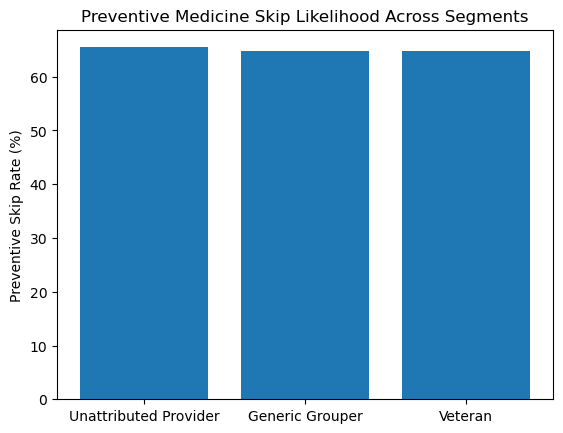

In [64]:
# Group by unattributed provider and calculate skip rate
skip_rates_un = df_data.groupby('unattributed_provider')['preventive_visit_gap_ind'].mean() * 100
skip_rate_unattributed = skip_rates_un.loc[1.0]
print(skip_rate_unattributed)

# Group by generic grouper and calculate skip rate
skip_rates_ge = df_data.groupby('generic_grouper')['preventive_visit_gap_ind'].mean() * 100
skip_rate_generic = skip_rates_ge.loc[1.0]
print(skip_rate_generic)

# Group by veteran and calculate skip rate
skip_rates_ve = df_data.groupby('veteran_ind')['preventive_visit_gap_ind'].mean() * 100
skip_rate_generic = skip_rates_ve.loc[1.0]
print(skip_rate_generic)

# Combine them into a list for plotting
skip_rates = [skip_rate_unattributed, skip_rate_generic, skip_rate_veteran]
labels = ['Unattributed Provider', 'Generic Grouper', 'Veteran']

# Plot the bar chart
import matplotlib.pyplot as plt
plt.bar(labels, skip_rates)
plt.ylabel('Preventive Skip Rate (%)')
plt.title('Preventive Medicine Skip Likelihood Across Segments')
plt.show()

In [86]:
high_risk_group = df_data[df_data['unattributed_provider'] == 1]
high_risk_summary = high_risk_group[[
    'age', 'all_mm_tenure', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt',
    'cnt_cp_webstatement_pmpm_ct', 'comp_physical_exam', 'compliant_cnt', 'consec_tenure_month',
    'days_since_last_clm', 'riskarr_downside',
    'rx_days_since_last_script',
    'total_allowed_pmpm_cost','total_net_paid_pmpm_cost', 'measure_type_Patient Experience', 'preventative_visit', 'rwjf_median_house_income'
]].mean()
print(high_risk_summary)

high_risk_group = df_data[df_data['generic_grouper'] == 1]
high_risk_summary = high_risk_group[[
    'age', 'all_mm_tenure', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt',
    'cnt_cp_webstatement_pmpm_ct', 'comp_physical_exam', 'compliant_cnt', 'consec_tenure_month',
    'days_since_last_clm', 'riskarr_downside',
    'rx_days_since_last_script',
    'total_allowed_pmpm_cost','total_net_paid_pmpm_cost', 'measure_type_Patient Experience', 'preventative_visit', 'rwjf_median_house_income'
]].mean()
print(high_risk_summary)

high_risk_group = df_data[df_data['veteran_ind'] == 1]
high_risk_summary = high_risk_group[[
    'age', 'all_mm_tenure', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt',
    'cnt_cp_webstatement_pmpm_ct', 'comp_physical_exam', 'compliant_cnt', 'consec_tenure_month',
    'days_since_last_clm', 'riskarr_downside',
    'rx_days_since_last_script',
    'total_allowed_pmpm_cost','total_net_paid_pmpm_cost', 'measure_type_Patient Experience', 'preventative_visit', 'rwjf_median_house_income'
]].mean()
print(high_risk_summary)

age                                   71.049978
all_mm_tenure                         37.655681
cms_tot_ma_payment_amt               773.656533
cms_tot_partd_payment_amt            127.368782
cnt_cp_webstatement_pmpm_ct            2.170335
comp_physical_exam                     0.017074
compliant_cnt                          0.738048
consec_tenure_month                   35.065903
days_since_last_clm                  147.276705
riskarr_downside                       0.017463
rx_days_since_last_script            160.093157
total_allowed_pmpm_cost              466.558632
total_net_paid_pmpm_cost             412.578542
measure_type_Patient Experience        0.203865
preventative_visit                     0.032252
rwjf_median_house_income           60231.130869
dtype: float64
age                                   71.553938
all_mm_tenure                         48.150998
cms_tot_ma_payment_amt               888.789450
cms_tot_partd_payment_amt            155.515662
cnt_cp_webstatement_pmpm_

In [127]:
# Calculate the overall average for all individuals
overall_summary = df_data[[
    'age', 'all_mm_tenure', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt',
    'cnt_cp_webstatement_pmpm_ct', 'comp_physical_exam', 'compliant_cnt', 'consec_tenure_month',
    'days_since_last_clm', 'riskarr_downside', 'rx_days_since_last_script',
    'total_allowed_pmpm_cost', 'total_net_paid_pmpm_cost', 'measure_type_Patient Experience', 'preventative_visit', 'rwjf_median_house_income', 'pcp_visit'
]].mean()
print("Overall Summary:")
print(overall_summary)

# Calculate the average for individuals who did NOT skip preventive medicine (preventive_visit_gap_ind == 0)
non_skip_group = df_data[df_data['preventive_visit_gap_ind'] == 0]
non_skip_summary = non_skip_group[[
    'age', 'all_mm_tenure', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt',
    'cnt_cp_webstatement_pmpm_ct', 'comp_physical_exam', 'compliant_cnt', 'consec_tenure_month',
    'days_since_last_clm', 'riskarr_downside', 'rx_days_since_last_script',
    'total_allowed_pmpm_cost', 'total_net_paid_pmpm_cost', 'measure_type_Patient Experience', 'preventative_visit', 'rwjf_median_house_income', 'pcp_visit'
]].mean()
print("\nNon-Skip Preventive Medicine Group Summary:")
print(non_skip_summary)

comparison_summary = pd.DataFrame({
    'Overall Average': overall_summary,
    'Non-Skip Average': non_skip_summary
})

Overall Summary:
age                                   72.314617
all_mm_tenure                         53.933186
cms_tot_ma_payment_amt               935.205270
cms_tot_partd_payment_amt            152.482784
cnt_cp_webstatement_pmpm_ct            3.030294
comp_physical_exam                     0.024404
compliant_cnt                          0.770385
consec_tenure_month                   50.395338
days_since_last_clm                   74.419397
riskarr_downside                       0.094304
rx_days_since_last_script             77.936202
total_allowed_pmpm_cost              650.807787
total_net_paid_pmpm_cost             578.181711
measure_type_Patient Experience        0.439628
preventative_visit                     0.046251
rwjf_median_house_income           59724.559710
pcp_visit                              0.010003
dtype: float64

Non-Skip Preventive Medicine Group Summary:
age                                   72.570405
all_mm_tenure                         55.352307
cms_tot_ma_

In [126]:
import pandas as pd
import itertools

feature_columns = [
    'age', 'all_mm_tenure', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt',
    'cnt_cp_webstatement_pmpm_ct', 'comp_physical_exam', 'compliant_cnt', 'consec_tenure_month',
    'days_since_last_clm', 'riskarr_downside', 'rx_days_since_last_script',
    'total_allowed_pmpm_cost', 'total_net_paid_pmpm_cost', 'measure_type_Patient Experience', 'preventative_visit', 'rwjf_median_house_income', 'pcp_visit'
]

combinations = list(itertools.product([0, 1], repeat=3))

results_df = pd.DataFrame()

for comb in combinations:
    U, G, V = comb
    # Filter the dataset based on the combination of U, G, and V
    group = df_data[(df_data['unattributed_provider'] == U) & 
                    (df_data['generic_grouper'] == G) & 
                    (df_data['veteran_ind'] == V)]
    
    group_summary = group[feature_columns].mean()
    
    total_count = group.shape[0]
    
    skip_count = group[group['preventive_visit_gap_ind'] == 1].shape[0]
    
    skip_rate = skip_count / total_count if total_count > 0 else 0  # Handle division by zero

    group_summary = pd.DataFrame(group_summary).T  # Transpose the Series to a row
    group_summary['U'] = U
    group_summary['G'] = G
    group_summary['V'] = V
    group_summary['count'] = total_count
    group_summary['skip_count'] = skip_count
    group_summary['skip_rate'] = skip_rate
    
    results_df = pd.concat([results_df, group_summary], ignore_index=True)

columns_order = ['U', 'G', 'V', 'count', 'skip_count', 'skip_rate'] + feature_columns
results_df = results_df[columns_order]

display(results_df)  

,U,G,V,count,skip_count,skip_rate,age,all_mm_tenure,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,cnt_cp_webstatement_pmpm_ct,comp_physical_exam,compliant_cnt,consec_tenure_month,days_since_last_clm,riskarr_downside,rx_days_since_last_script,total_allowed_pmpm_cost,total_net_paid_pmpm_cost,measure_type_Patient Experience,preventative_visit,rwjf_median_house_income,pcp_visit
0,0,0,0,818123,291950,0.356853,72.618785,57.583268,967.474618,155.808321,3.269677,0.029179,0.790883,53.978122,55.950305,0.149783,51.319577,691.238357,615.390081,0.490105,0.055811,61359.610984,0.010080
1,0,0,1,81699,41147,0.503641,75.099634,61.913316,972.352715,96.770020,2.737903,0.003072,0.788359,57.121213,92.753950,0.160173,157.909436,598.624780,534.191057,0.453408,0.006818,61183.535111,0.007369
2,0,1,0,344761,169249,0.490917,71.599827,54.430794,965.385705,180.816427,3.196100,0.025615,0.742632,50.804105,58.826703,0.011306,54.023486,707.282309,625.888605,0.486502,0.047059,55549.466335,0.011846
3,0,1,1,36050,22814,0.632843,74.610319,59.903051,938.147728,104.566214,2.573227,0.003079,0.751698,55.081692,101.391068,0.006768,165.899584,575.228881,513.115280,0.431706,0.006963,55765.589542,0.009015
4,1,0,0,993,612,0.616314,72.600201,42.534743,651.855347,96.723797,0.951431,0.011078,0.727231,40.067472,163.572004,0.194361,132.854985,80.422909,70.681032,0.210473,0.045317,83772.028197,0.015106
5,1,0,1,154,127,0.824675,73.824675,42.175325,583.666234,54.623442,0.486693,0.000000,0.763689,38.025974,239.733766,0.142857,286.694805,18.243287,14.395608,0.129870,0.012987,83319.948052,0.006494
6,1,1,0,194119,115045,0.592652,70.536851,36.916268,798.865172,149.800169,2.439582,0.021368,0.734383,34.536351,125.520248,0.019292,119.237236,525.716444,464.600934,0.233759,0.040156,60480.645362,0.009535
7,1,1,1,52005,46116,0.886761,72.927507,40.309143,682.448597,44.439733,1.193579,0.001211,0.751860,36.938294,227.902067,0.006884,312.741198,254.440917,226.102041,0.092376,0.002557,58781.899202,0.003057


In [108]:
!pip install plotly

In [110]:
import pandas as pd
import plotly.express as px

state_columns = [col for col in df_data.columns if col.startswith('state_')]

group1 = df_data[(df_data['unattributed_provider'] == 0) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 0)]
group2 = df_data[(df_data['unattributed_provider'] == 1) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 0)]
group3 = df_data[(df_data['unattributed_provider'] == 1) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 1)]

group1_state_counts = group1[state_columns].sum().reset_index()
group2_state_counts = group2[state_columns].sum().reset_index()
group3_state_counts = group3[state_columns].sum().reset_index()

group1_state_counts.columns = ['state', 'count_group1']
group2_state_counts.columns = ['state', 'count_group2']
group3_state_counts.columns = ['state', 'count_group3']

state_counts = pd.merge(group1_state_counts, group2_state_counts, on='state', how='outer')
state_counts = pd.merge(state_counts, group3_state_counts, on='state', how='outer')

# Clean up state names removing the 'state_' prefix
state_counts['state'] = state_counts['state'].str.replace('state_', '')

print(state_counts)

# Plot Group 1
fig_group1 = px.choropleth(state_counts, 
                           locations='state', 
                           locationmode="USA-states",
                           color='count_group1', 
                           scope="usa", 
                           title="Group 1 (U=0, G=1, V=0) Distribution",
                           color_continuous_scale="Blues")
fig_group1.show()

# Plot Group 2
fig_group2 = px.choropleth(state_counts, 
                           locations='state', 
                           locationmode="USA-states", 
                           color='count_group2', 
                           scope="usa", 
                           title="Group 2 (U=1, G=1, V=0) Distribution",
                           color_continuous_scale="Greens")
fig_group2.show()

# Plot Group 3
fig_group3 = px.choropleth(state_counts, 
                           locations='state', 
                           locationmode="USA-states", 
                           color='count_group3', 
                           scope="usa", 
                           title="Group 3 (U=1, G=1, V=1) Distribution",
                           color_continuous_scale="Oranges")
fig_group3.show()

   state  count_group1  count_group2  count_group3
0     AK             4            57             6
1     AL          8860          3024          1698
2     AR          3405          1227           742
3     AZ          4992          3853          1360
4     CA           273          1129            71
5     CO          5626          5493          1721
6     CT           296           648            61
7     DC             4            32             2
8     DE           366           278           161
9     FL         35059         11292          1879
10    GA         20372         15554          3750
11    GU             0             0             0
12    HI            20            85             6
13    IA          2149          1559           680
14    ID           467           961           306
15    IL          5017          5557           927
16    IN          6580          5546          1645
17    KS          2401          1445           583
18    KY         24259         

In [118]:
import pandas as pd
import plotly.express as px

state_columns = [col for col in df_data.columns if col.startswith('state_')]

overall_state_counts = df_data[state_columns].sum().reset_index()

overall_state_counts.columns = ['state', 'count']

overall_state_counts['state'] = overall_state_counts['state'].str.replace('state_', '')

print(overall_state_counts)

fig = px.choropleth(overall_state_counts, 
                    locations='state', 
                    locationmode="USA-states",  
                    color='count', 
                    scope="usa", 
                    title="Overall Distribution of Individuals Across US",
                    color_continuous_scale="Blues")

fig.show()

   state   count
0     AK      86
1     AL   31121
2     AR   14426
3     AZ   26055
4     CA    1865
5     CO   32729
6     CT    1226
7     DC      56
8     DE    1837
9     FL  111079
10    GA  120515
11    GU       1
12    HI    8633
13    IA   14217
14    ID    4942
15    IL   39056
16    IN   45485
17    KS   12179
18    KY   96137
19    LA   18166
20    MA    2152
21    MD    6431
22    ME    4715
23    MI   74613
24    MN   42424
25    MO   14859
26    MS   38579
27    MT   15702
28    NC  156695
29    ND    2714
30    NE    2390
31    NH    7287
32    NJ   10325
33    NM   22040
34    NV    9713
35    NY   49686
36    OH   61712
37    OK   28776
38    OR    6236
39    PA   29940
40    PR     446
41    RI      77
42    SC   60634
43    SD    5324
44    TN   14490
45    TX  126096
46    UT    8428
47    VA   37197
48    VT     358
49    WA   19110
50    WI   23992
51    WV   64722
52    WY     214


In [120]:
pd.set_option('display.max_columns', None)

columns_list = list(df_data.columns)
print(columns_list)

['id', 'compliant_cnt', 'measure_type_HEDIS', 'measure_type_Patient Experience', 'measure_type_Patient Safety', 'days_since_last_login', 'login_pmpm_ct', 'consec_tenure_month', 'all_mm_tenure', 'tenure_gap', 'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'riskarr_downside', 'riskarr_upside', 'riskarr_rewards', 'riskarr_global', 'COMP01_1metro', 'COMP01_2metro', 'COMP01_3metro', 'COMP01_4nonmetro', 'COMP01_5nonmetro', 'COMP01_6nonmetro', 'COMP01_7nonmetro', 'COMP01_8nonmetro', 'COMP01_9nonmetro', 'COMP01_ENG', 'COMP01_ARA', 'COMP01_BEN', 'COMP01_CHI', 'COMP01_CMN', 'COMP01_CPF', 'COMP01_CRE', 'COMP01_DUT', 'COMP01_FAS', 'COMP01_FRE', 'COMP01_GER', 'COMP01_HIN', 'COMP01_HMG', 'COMP01_ITA', 'COMP01_JPN', 'COMP01_KOR', 'COMP01_LAO', 'COMP01_MAN', 'COMP01_NAV', 'COMP01_OTH', 'COMP01_PER', 'COMP01_PHI', 'COMP01_POL', 'COMP01_POR', 'COMP01_RUS', 'COMP01_SPA', 'COMP01_TAG', 'COMP01_TGL', 'COMP01_THA', 'COMP01_VIE', 'COMP01_YUE', 'COMP01_ZZZ', 'rx_overall_pmpm_cost', 'rx_overall_net_paid_pmpm_

In [122]:
import pandas as pd

sales_channel_columns = ['COMP01_field', 'COMP01_consumerdirect', 'COMP01_Brokerage', 'COMP01_DMStelesales', 'COMP01_PartnerCallCenter']

group1 = df_data[(df_data['unattributed_provider'] == 0) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 0)]

group2 = df_data[(df_data['unattributed_provider'] == 1) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 0)]

group3 = df_data[(df_data['unattributed_provider'] == 1) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 1)]

group1_sales_counts = group1[sales_channel_columns].sum()
group2_sales_counts = group2[sales_channel_columns].sum()
group3_sales_counts = group3[sales_channel_columns].sum()

sales_summary = pd.DataFrame({
    'Group 1 (U=0, G=1, V=0)': group1_sales_counts,
    'Group 2 (U=1, G=1, V=0)': group2_sales_counts,
    'Group 3 (U=1, G=1, V=1)': group3_sales_counts
})

print(sales_summary.to_markdown())

|                          |   Group 1 (U=0, G=1, V=0) |   Group 2 (U=1, G=1, V=0) |   Group 3 (U=1, G=1, V=1) |
|:-------------------------|--------------------------:|--------------------------:|--------------------------:|
| COMP01_field             |                    124866 |                     66221 |                     26005 |
| COMP01_consumerdirect    |                    107597 |                     71997 |                      8450 |
| COMP01_Brokerage         |                     12751 |                      5442 |                      2086 |
| COMP01_DMStelesales      |                     28949 |                     11679 |                      2317 |
| COMP01_PartnerCallCenter |                     70098 |                     38244 |                     13058 |


In [123]:
import pandas as pd

sales_channel_columns = ['COMP01_field', 'COMP01_consumerdirect', 'COMP01_Brokerage', 'COMP01_DMStelesales', 'COMP01_PartnerCallCenter']

group1 = df_data[(df_data['unattributed_provider'] == 0) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 0) &
                 (df_data['preventive_visit_gap_ind'] == 1)]

group2 = df_data[(df_data['unattributed_provider'] == 1) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 0) &
                 (df_data['preventive_visit_gap_ind'] == 1)]

group3 = df_data[(df_data['unattributed_provider'] == 1) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 1) &
                 (df_data['preventive_visit_gap_ind'] == 1)]

group1_sales_counts = group1[sales_channel_columns].sum()
group2_sales_counts = group2[sales_channel_columns].sum()
group3_sales_counts = group3[sales_channel_columns].sum()

sales_summary = pd.DataFrame({
    'Group 1 (U=0, G=1, V=0, skipped=1)': group1_sales_counts,
    'Group 2 (U=1, G=1, V=0, skipped=1)': group2_sales_counts,
    'Group 3 (U=1, G=1, V=1, skipped=1)': group3_sales_counts
})

print(sales_summary.to_markdown())

|                          |   Group 1 (U=0, G=1, V=0, skipped=1) |   Group 2 (U=1, G=1, V=0, skipped=1) |   Group 3 (U=1, G=1, V=1, skipped=1) |
|:-------------------------|-------------------------------------:|-------------------------------------:|-------------------------------------:|
| COMP01_field             |                                61166 |                                40090 |                                23311 |
| COMP01_consumerdirect    |                                48619 |                                39075 |                                 7010 |
| COMP01_Brokerage         |                                 6243 |                                 3231 |                                 1829 |
| COMP01_DMStelesales      |                                14971 |                                 6877 |                                 1878 |
| COMP01_PartnerCallCenter |                                37986 |                                25464 |                  

In [125]:
import pandas as pd

sales_channel_columns = ['COMP01_ENG', 'COMP01_ARA', 'COMP01_BEN', 'COMP01_CHI', 'COMP01_CMN', 'COMP01_CPF', 'COMP01_CRE', 'COMP01_DUT', 'COMP01_FAS', 'COMP01_FRE', 'COMP01_GER', 'COMP01_HIN', 'COMP01_HMG', 'COMP01_ITA', 'COMP01_JPN', 'COMP01_KOR', 'COMP01_LAO', 'COMP01_MAN', 'COMP01_NAV', 'COMP01_OTH', 'COMP01_PER', 'COMP01_PHI', 'COMP01_POL', 'COMP01_POR', 'COMP01_RUS', 'COMP01_SPA', 'COMP01_TAG', 'COMP01_TGL', 'COMP01_THA', 'COMP01_VIE', 'COMP01_YUE', 'COMP01_ZZZ']

group1 = df_data[(df_data['unattributed_provider'] == 0) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 0) &
                 (df_data['preventive_visit_gap_ind'] == 1)]

group2 = df_data[(df_data['unattributed_provider'] == 1) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 0) &
                 (df_data['preventive_visit_gap_ind'] == 1)]

group3 = df_data[(df_data['unattributed_provider'] == 1) & 
                 (df_data['generic_grouper'] == 1) & 
                 (df_data['veteran_ind'] == 1) &
                 (df_data['preventive_visit_gap_ind'] == 1)]

group1_sales_counts = group1[sales_channel_columns].sum()
group2_sales_counts = group2[sales_channel_columns].sum()
group3_sales_counts = group3[sales_channel_columns].sum()

sales_summary = pd.DataFrame({
    'Group 1 (U=0, G=1, V=0, skipped=1)': group1_sales_counts,
    'Group 2 (U=1, G=1, V=0, skipped=1)': group2_sales_counts,
    'Group 3 (U=1, G=1, V=1, skipped=1)': group3_sales_counts
})

print(sales_summary.to_markdown())

|            |   Group 1 (U=0, G=1, V=0, skipped=1) |   Group 2 (U=1, G=1, V=0, skipped=1) |   Group 3 (U=1, G=1, V=1, skipped=1) |
|:-----------|-------------------------------------:|-------------------------------------:|-------------------------------------:|
| COMP01_ENG |                               116606 |                                83835 |                                35637 |
| COMP01_ARA |                                    3 |                                    2 |                                    0 |
| COMP01_BEN |                                    0 |                                    0 |                                    0 |
| COMP01_CHI |                                   31 |                                   51 |                                    6 |
| COMP01_CMN |                                    1 |                                    2 |                                    0 |
| COMP01_CPF |                                    6 |                       

In [124]:
import pandas as pd

sales_channel_columns = ['COMP01_field', 'COMP01_consumerdirect', 'COMP01_Brokerage', 'COMP01_DMStelesales', 'COMP01_PartnerCallCenter']

non_skip_group = df_data[df_data['preventive_visit_gap_ind'] == 0]

non_skip_sales_counts = non_skip_group[sales_channel_columns].sum()

sales_summary = pd.DataFrame(non_skip_sales_counts, columns=['Count'])

print(sales_summary.to_markdown())

|                          |   Count |
|:-------------------------|--------:|
| COMP01_field             |  301449 |
| COMP01_consumerdirect    |  317317 |
| COMP01_Brokerage         |   29854 |
| COMP01_DMStelesales      |   61581 |
| COMP01_PartnerCallCenter |  129494 |


In [19]:


X = df_data.drop(columns=['id','preventive_visit_gap_ind'])
y = df_data['preventive_visit_gap_ind']


In [20]:

# split train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [22]:

# Best Model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators = 550,
    max_depth =  9, 
    learning_rate = 0.1, 
    gamma = 0.27,
    subsample = 0.9,
    colsample_bytree = 0.67,
    reg_alpha = 1e-07,
    reg_lambda = 100,
    min_child_weight = 8
)

In [23]:
# Check Manually
xgb_model.fit(X_train, y_train)
y_test_pred = xgb_model.predict(X_test)
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]

y_train_pred = xgb_model.predict(X_train)
y_train_proba = xgb_model.predict_proba(X_train)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

print(f"Test Accuracy: {test_accuracy}")
print(f'Test ROC-AUC Score: {test_roc_auc}')

print(f"Train Accuracy: {train_accuracy}")
print(f'Train ROC-AUC Score: {train_roc_auc}')

Test Accuracy: 0.7010318049878755
Test ROC-AUC Score: 0.768097792098058
Train Accuracy: 0.7530112744340081
Train ROC-AUC Score: 0.8299491776123515


——————————————————————————————————————————————————————————————————————————————————————

Feature Importance

In [24]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


                             feature  gain_score
213               preventative_visit  179.001205
236                      veteran_ind  176.083557
232                  generic_grouper  158.277710
12                  riskarr_downside  125.230759
188         total_net_paid_pmpm_cost   93.434814
231                         er_visit   82.399574
227                      obgyn_visit   75.432884
233            unattributed_provider   70.754356
37            rx_overall_gpi_pmpm_ct   63.942036
266                         state_NM   56.914074
10                      disabled_ind   55.917744
2    measure_type_Patient Experience   55.602352
260                         state_MS   52.291378
282                         state_WV   49.281540
249                         state_IL   46.787910
187          total_allowed_pmpm_cost   44.962631
214               comp_physical_exam   44.690765
189         total_cob_paid_pmpm_cost   43.416206
0                      compliant_cnt   39.638416
256                 

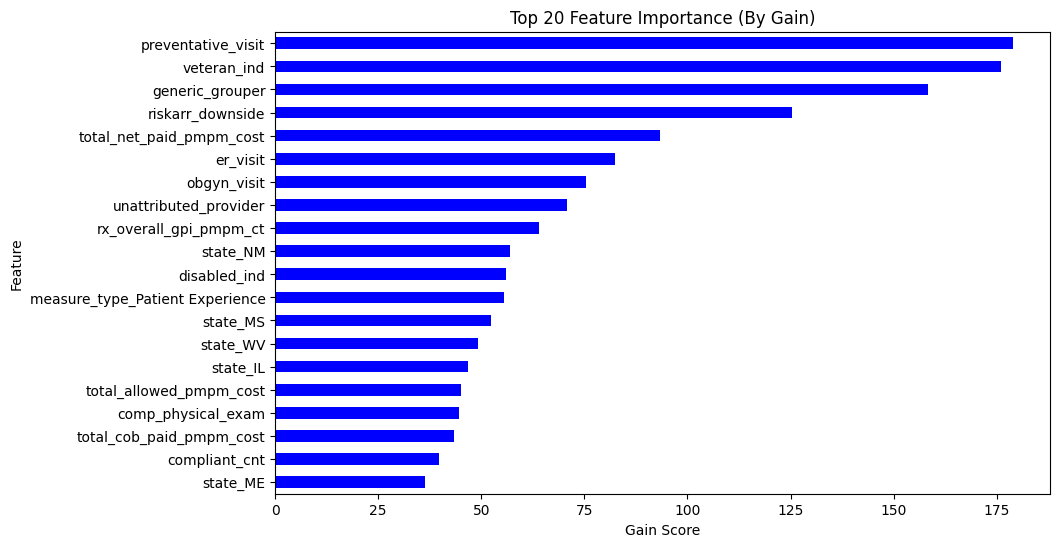

In [19]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Get feature importance by 'gain'
importance_gain = xgb_model.get_booster().get_score(importance_type='gain')

importance_gain_df = pd.DataFrame(importance_gain.items(), columns=['feature', 'gain_score'])
importance_gain_df = importance_gain_df.sort_values(by='gain_score', ascending=False)

top_gain_features = importance_gain_df.head(20)

print(top_gain_features)

plt.figure(figsize=(10, 6))
top_gain_features.set_index('feature')['gain_score'].plot(kind='barh', color='blue')  # Changed to 'barh' for horizontal bars
plt.title('Top 20 Feature Importance (By Gain)')
plt.xlabel('Gain Score')  
plt.ylabel('Feature')
plt.gca().invert_yaxis()  
plt.show()

                           feature  weight_score
200         cms_tot_ma_payment_amt        2642.0
201      cms_tot_partd_payment_amt        2419.0
0                    compliant_cnt        2313.0
194            days_since_last_clm        2282.0
235                            age        2067.0
188       total_net_paid_pmpm_cost        1885.0
193       total_mbr_resp_pmpm_cost        1796.0
7                    all_mm_tenure        1779.0
191          total_copay_pmpm_cost        1756.0
32   rx_overall_net_paid_pmpm_cost        1630.0
6              consec_tenure_month        1609.0
36   rx_overall_mbr_resp_pmpm_cost        1607.0
187        total_allowed_pmpm_cost        1588.0
168    cnt_cp_webstatement_pmpm_ct        1585.0
31            rx_overall_pmpm_cost        1571.0
34      rx_overall_copay_pmpm_cost        1524.0
114      rwjf_diabetes_monitor_pct        1494.0
98             rwjf_dui_deaths_pct        1492.0
44       rx_days_since_last_script        1462.0
40               rx_

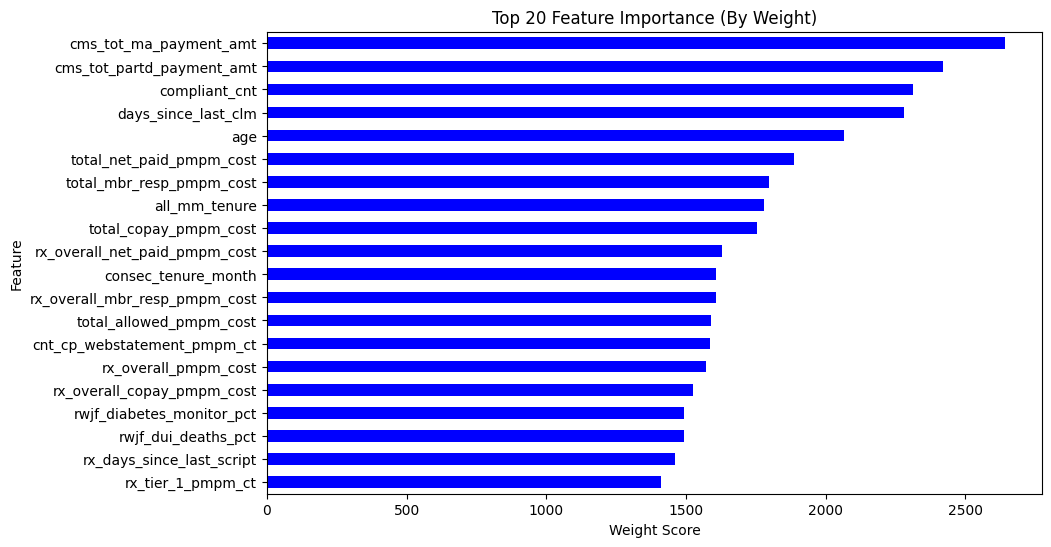

                            feature  gain_score  weight_score
0                               age         NaN        2067.0
1                     all_mm_tenure         NaN        1779.0
2            cms_tot_ma_payment_amt         NaN        2642.0
3         cms_tot_partd_payment_amt         NaN        2419.0
4       cnt_cp_webstatement_pmpm_ct         NaN        1585.0
5                comp_physical_exam   44.690765           NaN
6                     compliant_cnt   39.638416        2313.0
7               consec_tenure_month         NaN        1609.0
8               days_since_last_clm         NaN        2282.0
9                      disabled_ind   55.917744           NaN
10                         er_visit   82.399574           NaN
11                  generic_grouper  158.277710           NaN
12  measure_type_Patient Experience   55.602352           NaN
13                      obgyn_visit   75.432884           NaN
14               preventative_visit  179.001205           NaN
15      

In [22]:
# Get feature importance scores by 'weight'
importance_weight = xgb_model.get_booster().get_score(importance_type='weight')

importance_weight_df = pd.DataFrame(importance_weight.items(), columns=['feature', 'weight_score'])
importance_weight_df = importance_weight_df.sort_values(by='weight_score', ascending=False)

top_weight_features = importance_weight_df.head(20)

print(top_weight_features)

plt.figure(figsize=(10, 6))
top_weight_features.set_index('feature')['weight_score'].plot(kind='barh', color='blue')  # Changed to 'barh' for horizontal bars
plt.title('Top 20 Feature Importance (By Weight)')
plt.xlabel('Weight Score')  
plt.ylabel('Feature')
plt.gca().invert_yaxis()  
plt.show()

combined_features = pd.merge(top_gain_features, top_weight_features, on='feature', how='outer', suffixes=('_gain', '_weight'))

print(combined_features)

In [15]:
# Check Veteran is good or bad
df_data['predictions'] = xgb_model.predict(X)

# Check how often veterans are 1 or 0
veteran_pred_distribution = df_data[df_data['veteran_ind'] == 1]['predictions'].value_counts()
print(veteran_pred_distribution)

# Compare to  general population
general_pred_distribution = df_data['predictions'].value_counts()
print(general_pred_distribution)

predictions
1    111142
0     58766
Name: count, dtype: int64
predictions
0    957581
1    570323
Name: count, dtype: int64


——————————————————————————————————————————————————————————————————————————————————————

Clustering

In [25]:
# Define the important features based on analysis
#selected_features = ['age', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt', 'compliant_cnt', 
                     #'days_since_last_clm', 'er_visit', 'generic_grouper', 'preventative_visit', 
                     #'riskarr_downside', 'total_allowed_pmpm_cost', 'total_net_paid_pmpm_cost', 'veteran_ind']

selected_features = [
    'age', 'all_mm_tenure', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt',
    'cnt_cp_webstatement_pmpm_ct', 'comp_physical_exam', 'compliant_cnt', 'consec_tenure_month',
    'days_since_last_clm', 'disabled_ind', 'er_visit', 'generic_grouper', 'measure_type_Patient Experience',
    'obgyn_visit', 'preventative_visit', 'riskarr_downside', 'rwjf_diabetes_monitor_pct', 'rwjf_dui_deaths_pct',
    'rx_days_since_last_script', 'rx_overall_copay_pmpm_cost', 'rx_overall_gpi_pmpm_ct', 
    'rx_overall_mbr_resp_pmpm_cost', 'rx_overall_net_paid_pmpm_cost', 'rx_overall_pmpm_cost', 
    'rx_tier_1_pmpm_ct', 'state_IL', 'state_ME', 'state_MS', 'state_NM', 'state_WV', 
    'total_allowed_pmpm_cost', 'total_cob_paid_pmpm_cost', 'total_copay_pmpm_cost', 
    'total_mbr_resp_pmpm_cost', 'total_net_paid_pmpm_cost', 'unattributed_provider', 'veteran_ind'
]

# Filter dataset to only include the selected features
X_selected = X_test[selected_features]  # Create a new dataframe with only the important features

In [28]:
from sklearn.cluster import KMeans

# Perform KMeans clustering on the filtered dataset
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X_selected['Cluster'] = kmeans.fit_predict(X_selected)

X_test['Cluster'] = X_selected['Cluster']

cluster_means = X_test.groupby('Cluster')[selected_features].mean()

print(cluster_means)

               age  all_mm_tenure  cms_tot_ma_payment_amt  \
Cluster                                                     
0        71.786617      56.359770             2430.284519   
1        72.372204      53.776868              866.856643   
2        67.752515      54.799799             1794.903702   

         cms_tot_partd_payment_amt  cnt_cp_webstatement_pmpm_ct  \
Cluster                                                           
0                       212.303281                     9.124042   
1                       148.836257                     2.758695   
2                       305.175755                     5.490626   

         comp_physical_exam  compliant_cnt  consec_tenure_month  \
Cluster                                                           
0                  0.019605       0.703914            51.849968   
1                  0.024536       0.772551            50.263373   
2                  0.032696       0.780229            51.213280   

         days_since_la

/var/folders/kl/s32vk23s4bgfkqkwtq8dlh440000gn/T/ipykernel_7683/3134814039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['Cluster'] = kmeans.fit_predict(X_selected)


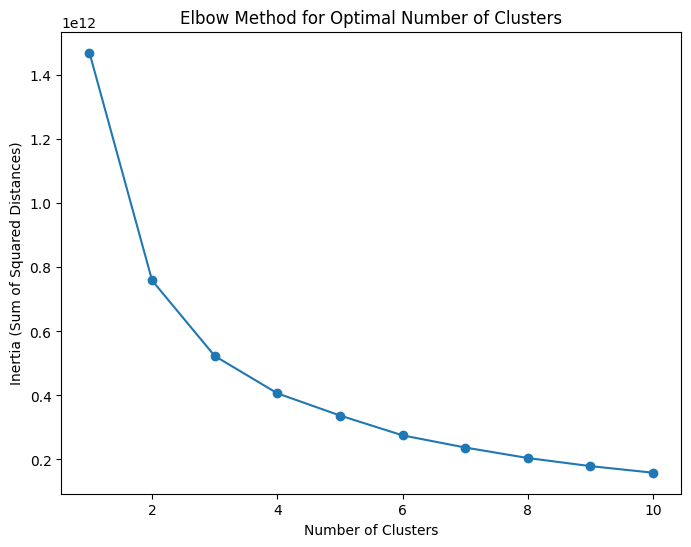

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

In [35]:
# Check mean feature values by cluster
cluster_feature_means = X_test.groupby('Cluster')[selected_features].mean()

print("Feature means by cluster:")
print(cluster_feature_means)

Feature means by cluster:
               age  cms_tot_ma_payment_amt  cms_tot_partd_payment_amt  \
Cluster                                                                 
0        72.716603             1876.087993                 198.723451   
1        72.302193              835.657381                 147.709213   
2        70.127485             3228.417908                 236.704507   

         compliant_cnt  days_since_last_clm  er_visit  generic_grouper  \
Cluster                                                                  
0             0.716065            25.689662  0.763698         0.380980   
1             0.775058            79.222083  0.331336         0.413944   
2             0.700516            18.877701  0.820225         0.383319   

         preventative_visit  riskarr_downside  total_allowed_pmpm_cost  \
Cluster                                                                  
0                  0.041549          0.087692              3331.647156   
1              

PCA

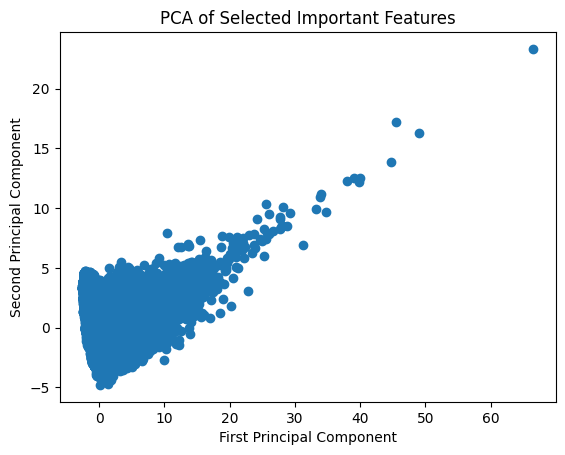

[0.21037223 0.1085997 ]


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_standardized = StandardScaler().fit_transform(X_selected)  

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_standardized)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Selected Important Features')
plt.show()

print(pca.explained_variance_ratio_)


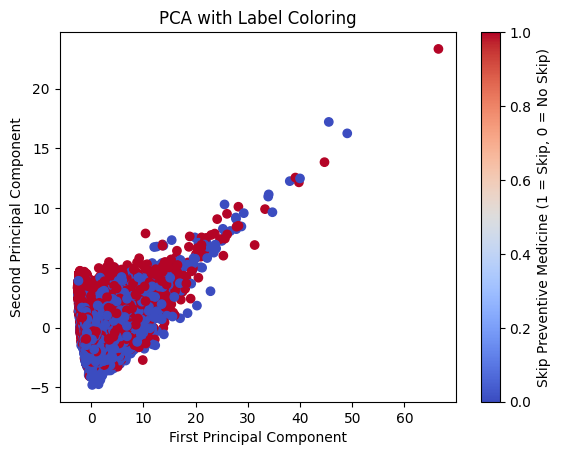

In [41]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='coolwarm')  
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with Label Coloring')
plt.colorbar(label='Skip Preventive Medicine (1 = Skip, 0 = No Skip)')
plt.show()

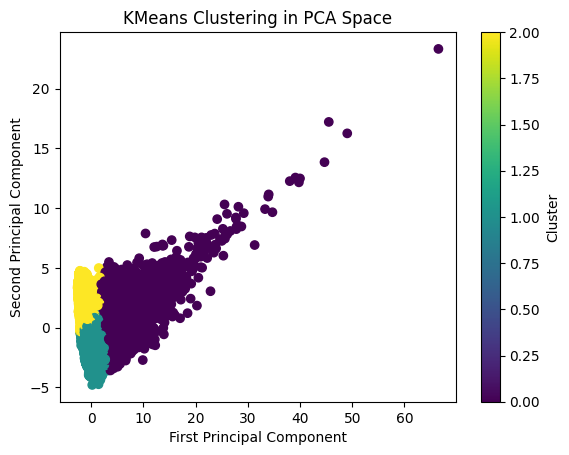

In [42]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering in PCA Space')
plt.colorbar(label='Cluster')
plt.show()

In [44]:
import pandas as pd

selected_features = ['age', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt', 'compliant_cnt', 'days_since_last_clm', 
                     'er_visit', 'generic_grouper', 'preventative_visit', 'riskarr_downside', 'total_allowed_pmpm_cost', 
                     'total_net_paid_pmpm_cost', 'veteran_ind']


correlation_data = df_data[selected_features + ['preventive_visit_gap_ind']]

correlation_matrix = correlation_data.corr()

print(correlation_matrix['preventive_visit_gap_ind'].sort_values(ascending=False))


KeyError: "['SCORE'] not in index"

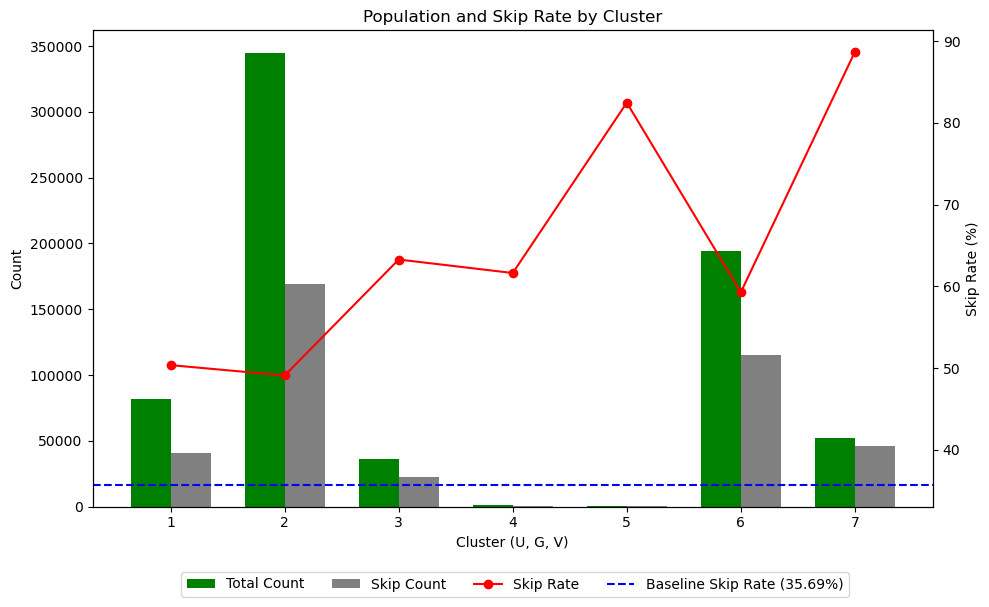

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
clusters = ['1', '2', '3', '4', '5', '6', '7']
count = [81699, 344761, 36050, 993, 154, 194119, 52005]
skip_count = [41147, 169249, 22814, 612, 127, 115045, 46116]
skip_rate = [50.36, 49.09, 63.28, 61.63, 82.47, 59.27, 88.68]
baseline_skip_rate = 35.69  

bar_width = 0.35
index = np.arange(len(clusters))

fig, ax1 = plt.subplots(figsize=(10,6))  

bar1 = ax1.bar(index, count, bar_width, label='Total Count', color='green')
bar2 = ax1.bar(index + bar_width, skip_count, bar_width, label='Skip Count', color='grey')

ax2 = ax1.twinx()
line = ax2.plot(index + bar_width / 2, skip_rate, color='red', marker='o', label='Skip Rate')

ax2.axhline(y=baseline_skip_rate, color='blue', linestyle='--', label='Baseline Skip Rate (35.69%)')

ax1.set_xlabel('Cluster (U, G, V)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Skip Rate (%)')
ax1.set_title('Population and Skip Rate by Cluster')

fig.legend(loc='upper center', bbox_to_anchor=(0.52, -0.0), ncol=4)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.xticks(index + bar_width / 2, clusters)
plt.show()

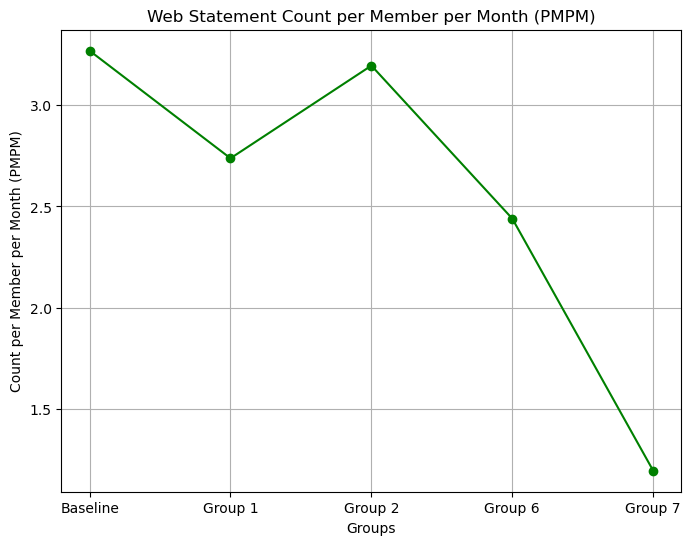

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
groups = ['Baseline', 'Group 1', 'Group 2', 'Group 6', 'Group 7']
cnt_cp_webstatement_pmpm_ct = [3.269677, 2.737903, 3.1961, 2.439582, 1.193579]

# Create DataFrame
df = pd.DataFrame({
    'groups': groups,
    'cnt_cp_webstatement_pmpm_ct': cnt_cp_webstatement_pmpm_ct
})

plt.figure(figsize=(8, 6))
plt.plot(df['groups'], df['cnt_cp_webstatement_pmpm_ct'], marker='o', color='green')
plt.title('Web Statement Count per Member per Month (PMPM)')
plt.xlabel('Groups')
plt.ylabel('Count per Member per Month (PMPM)')
plt.grid(True)
plt.show()

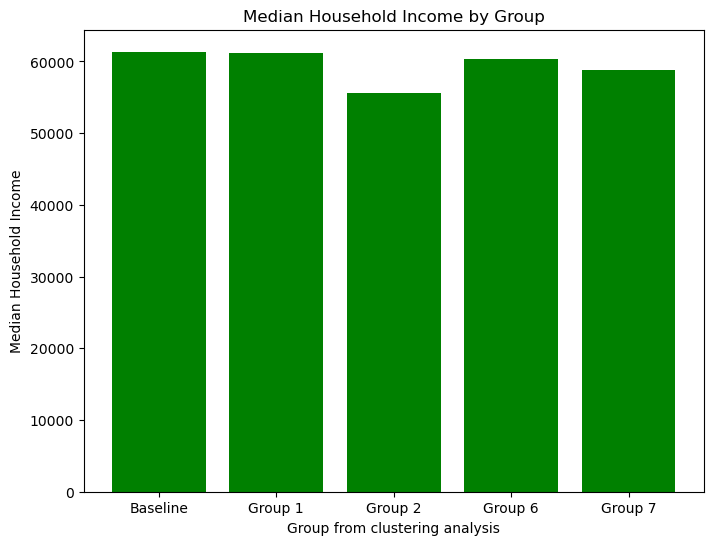

In [156]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
groups = ['Baseline', 'Group 1', 'Group 2', 'Group 6', 'Group 7']
median_house_income = [61359.61, 61183.54, 55549.47, 60380.65, 58781.90]

# Create DataFrame
df = pd.DataFrame({
    'groups': groups,
    'median_house_income': median_house_income
})

plt.figure(figsize=(8, 6))
plt.bar(df['groups'], df['median_house_income'], color='green')
plt.title('Median Household Income by Group')
plt.xlabel('Group from clustering analysis')
plt.ylabel('Median Household Income')
plt.show()

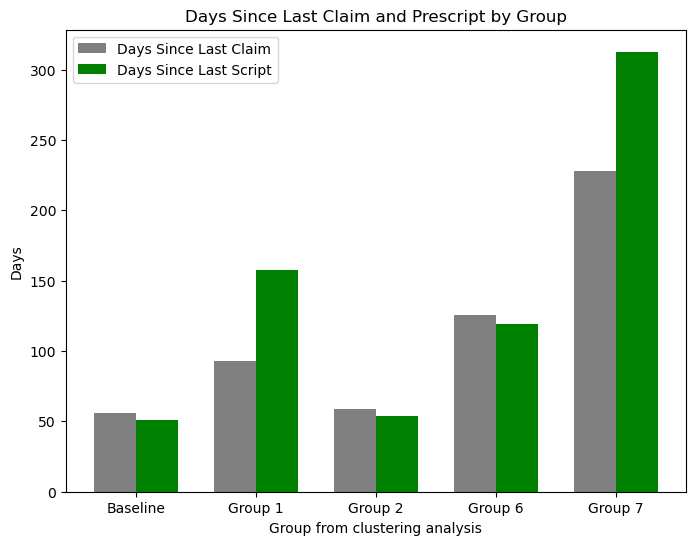

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
groups = ['Baseline', 'Group 1', 'Group 2', 'Group 6', 'Group 7']
days_since_last_clm = [55.950305, 92.75395, 58.826703, 125.502248, 227.902067]
days_since_last_script = [51.319577, 157.909436, 54.023486, 119.237236, 312.741198]

# Create DataFrame
df = pd.DataFrame({
    'groups': groups,
    'days_since_last_clm': days_since_last_clm,
    'days_since_last_script': days_since_last_script
})

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(df['groups']))

plt.bar(index, df['days_since_last_clm'], bar_width, label='Days Since Last Claim', color='grey')
plt.bar([i + bar_width for i in index], df['days_since_last_script'], bar_width, label='Days Since Last Script', color='green')

plt.title('Days Since Last Claim and Prescript by Group')
plt.xlabel('Group from clustering analysis')
plt.ylabel('Days')
plt.xticks([i + bar_width / 2 for i in index], df['groups'])
plt.legend()
plt.show()

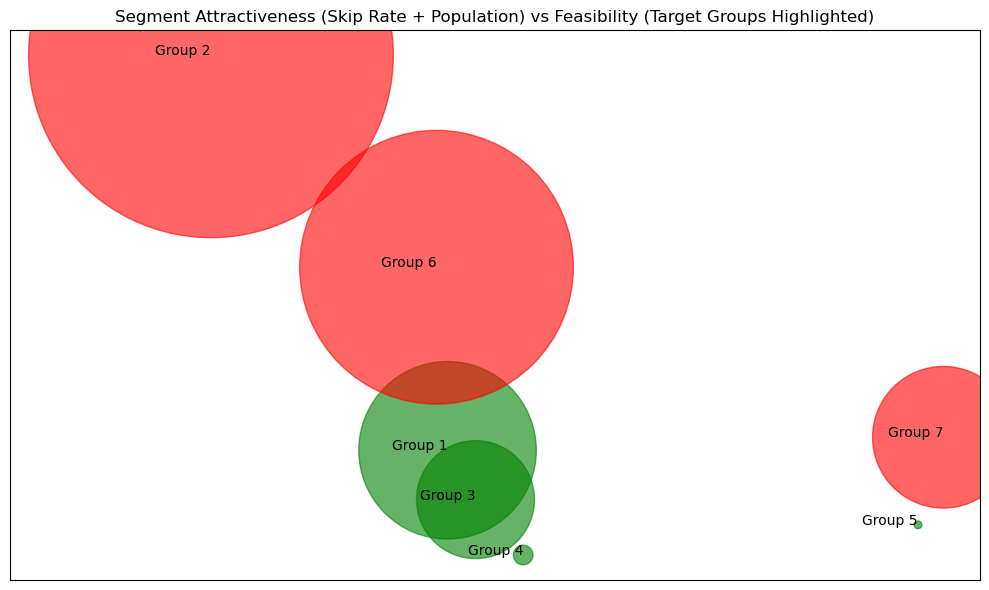

In [185]:
import matplotlib.pyplot as plt
import numpy as np

groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7']
skip_rate = [50.36, 49.09, 63.28, 61.63, 82.47, 59.27, 88.68]  
population_size = [81699, 344761, 36050, 993, 154, 194119, 52005]  

feasibility_score = [
    2.737903 + 0.003072 + 0.788359 + 92.75395 + 0.160173 + 157.909436 ,  # Group 1
    3.1961 + 0.025615 + 0.742632 + 58.826703 + 0.011306 + 54.023486 ,  # Group 2
    2.573227 + 0.003079 + 0.751698 + 101.391068 + 0.006768 + 165.899854 ,  # Group 3
    0.951431 + 0.011078 + 0.727231 + 163.572004 + 0.194361 + 132.854985 ,  # Group 4
    0.486693 + 0 + 0.763689 + 239.733766 + 0.142857 + 286.694805 ,  # Group 5
    2.439582 + 0.021368 + 0.734383 + 125.502248 + 0.019292 + 119.237236 ,  # Group 6
    1.193579 + 0.001211 + 0.75186 + 227.902067 + 0.006884 + 312.741198  # Group 7
]

# Giving 50% weight to skip rate and 50% to population size (scaled)
population_scaled = [pop / 1000 for pop in population_size]  
segment_attractiveness = [(0.5 * skip_rate[i]) + (0.5 * population_scaled[i]) for i in range(len(groups))]

# Highlighted groups
highlight_groups = ['Group 2', 'Group 6', 'Group 7']

plt.figure(figsize=(10, 6))

# Define bubble sizes based on population
bubble_sizes = [size / 5 for size in population_size]  

colors = ['red' if group in highlight_groups else 'green' for group in groups]
plt.scatter(feasibility_score, segment_attractiveness, s=bubble_sizes, alpha=0.6, color=colors)

for i, group in enumerate(groups):
    plt.text(feasibility_score[i], segment_attractiveness[i], group, fontsize=10, ha='right')

plt.title('Segment Attractiveness (Skip Rate + Population) vs Feasibility (Target Groups Highlighted)')

plt.xlim(left=0)
plt.xticks([])  
plt.yticks([])  

plt.tight_layout()
plt.show()